In [1]:
import os
import pandas as pd

import numpy as np

import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.utils import make_grid
# from torchsummary import summary

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir_images = '/Users/nikitakamenev/Documents/dataset/scince/data_image/wing_10_11/'
list_path_img = sorted(os.listdir(dir_images))

dir_force_csv = '/Users/nikitakamenev/Documents/dataset/scince/data_image/forces-airfoil-0.csv'
df = pd.read_csv(dir_force_csv)

In [3]:
df

,t,Fx,Fy,Mz,Ftaux,Ftauy,Mtau
0,0.001,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.002,1.27266,1.43067,-0.011931,0.000000,0.000000,0.000000
2,0.003,1.27284,1.43126,-0.011841,0.001074,-0.000140,-0.000013
3,0.004,1.27314,1.43203,-0.011741,0.002158,-0.000282,-0.000026
4,0.005,1.27353,1.43373,-0.011325,0.003254,-0.000425,-0.000039
...,...,...,...,...,...,...,...
4995,4.996,8.47258,52.48830,-10.626200,0.502824,-0.092453,0.043798
4996,4.997,9.12782,56.25440,-10.564600,0.513078,-0.092435,0.043615
4997,4.998,8.69260,54.08690,-10.561500,0.508880,-0.091396,0.043093
4998,4.999,8.68157,54.01290,-10.295700,0.513117,-0.093429,0.040491


In [90]:
max_force = max(max(df['Fy']), max(df['Fx']))
min_force = min(min(df['Fy']), min(df['Fx']))

max_force_X = max(df['Fx'])
max_force_Y = max(df['Fy'])
print(max_force, min_force)

85.8021 -0.110929


In [5]:
df['Fx'] = df['Fx']/max_force_X
df['Fy'] = df['Fy']/max_force_Y

df

,t,Fx,Fy,Mz,Ftaux,Ftauy,Mtau
0,0.001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002,0.066877,0.016674,-0.011931,0.000000,0.000000,0.000000
2,0.003,0.066887,0.016681,-0.011841,0.001074,-0.000140,-0.000013
3,0.004,0.066902,0.016690,-0.011741,0.002158,-0.000282,-0.000026
4,0.005,0.066923,0.016710,-0.011325,0.003254,-0.000425,-0.000039
...,...,...,...,...,...,...,...
4995,4.996,0.445227,0.611737,-10.626200,0.502824,-0.092453,0.043798
4996,4.997,0.479659,0.655630,-10.564600,0.513078,-0.092435,0.043615
4997,4.998,0.456789,0.630368,-10.561500,0.508880,-0.091396,0.043093
4998,4.999,0.456209,0.629506,-10.295700,0.513117,-0.093429,0.040491


In [6]:
# import numpy as np

# width, height = 1912, 800
# resize_func = np.vectorize(lambda path: cv2.resize(cv2.imread(dir_images + path, cv2.IMREAD_GRAYSCALE), (width, height)))
# images = np.array(resize_func(list_path_img[:-1]))

# # Преобразование массива images в список пар изображений
# np_images = images.reshape(-1, 2, height, width)


In [91]:
# import numpy as np
# from tqdm import tqdm

# list_images = []
# width, height = 1912, 800

# for i, path in tqdm(enumerate(list_path_img[:-1:2]), total=len(list_path_img[:-1:2])):
#     img1 = cv2.imread(dir_images + path, cv2.IMREAD_GRAYSCALE)
#     img1 = cv2.resize(img1, (width, height))
#     img2 = cv2.imread(dir_images + list_path_img[i + 1], cv2.IMREAD_GRAYSCALE)
#     img2 = cv2.resize(img2, (width, height))
#     list_images.append(np.array((img1, img2)))


In [145]:
list_images = []
inter_images = []

for i in tqdm(range(0, len(list_path_img)-1,2)):
  img1 = cv2.imread(dir_images + list_path_img[i], cv2.IMREAD_GRAYSCALE)
  img1 = cv2.resize(img1, (1912, 800))[200:600, 500:1750]
  # plt.imshow(img1)
  # plt.show()
  img2 = cv2.imread(dir_images + list_path_img[i+1], cv2.IMREAD_GRAYSCALE)
  img2 = cv2.resize(img2, (1912, 800))[200:600, 500:1750]
  list_images.append(np.array((img1, img2)))
  # plt.imshow(img2)
  # plt.show()



100%|█████████████████████████████████████████| 150/150 [00:04<00:00, 33.82it/s]


In [107]:
list_images = []
inter_images = []

for i in tqdm(range(0, len(list_path_img)-1,3)):
  img1 = cv2.imread(dir_images + list_path_img[i], cv2.IMREAD_GRAYSCALE)
  img1 = cv2.resize(img1, (1912, 800))[200:600, 500:1750]
  # plt.imshow(img1)
  # plt.show()
  img2 = cv2.imread(dir_images + list_path_img[i+1], cv2.IMREAD_GRAYSCALE)
  img2 = cv2.resize(img2, (1912, 800))[200:600, 500:1750]
  list_images.append(np.array((img1, img2)))

  img3 = cv2.imread(dir_images + list_path_img[i+2], cv2.IMREAD_GRAYSCALE)
  img3 = cv2.resize(img3, (1912, 800))[200:600, 500:1750]
  list_images.append(np.array((img1, img2, img3)))
  # plt.imshow(img2)

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 26.96it/s]


In [146]:
list_images[0].shape

(2, 400, 1250)

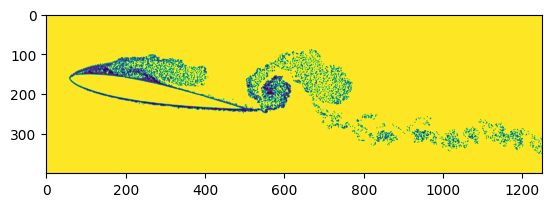

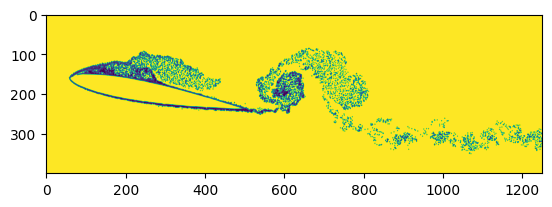

In [147]:
i = 100

plt.imshow(list_images[i][0])
plt.show()
plt.imshow(list_images[i][1])
plt.show()

In [148]:
np_images = np.array(list_images)

LABELS

In [149]:
size_label = 151

Fx = [float(df['Fx'][i]) for i in range(len(df['Fx']))][1:size_label]
Fy = [float(df['Fy'][i]) for i in range(len(df['Fy']))][1:size_label]

labels_list = []

for fx, fy in tqdm(zip(Fx,Fy)):
  labels_list.append(np.array((fx,fy)))

np_labels = np.array(labels_list)

150it [00:00, 310535.83it/s]


In [150]:
print(len(np_labels))

150


In [151]:
# # Map-style dataset return one sample of data by index

# class CustomDataset(Dataset):
#     def __init__(self, images_array, labels_array,transform=None, target_transform=None):

#         self.images = images_array
#         self.labels = labels_array

#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         image = torch.Tensor(self.images[idx])
#         label = torch.Tensor(self.labels[idx])
        
# #         image = torch.reshape(image,(8,128,128))
# #         image = torch.reshape(image,(image.shape[0],image.shape[1],image.shape[3]))
# #         image = self.transform(image)
# #         if self.transform:
# #             image = self.transform(image)
# #         if self.target_transform:
# #             label = self.target_transform(label)
#         return image, label

In [152]:
class CustomDataset(Dataset):
    def __init__(self, images_array, targets_array, transform=None):
        self.images = images_array
        self.targets = targets_array
        self.transform = transform

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        image = torch.Tensor(self.images[idx])
        target = torch.Tensor(self.targets[idx])

        if self.transform:
            image = self.transform(image)

        return image, target

In [171]:
# Трансформации данных для обработки и нормализации изображений
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((512, 512)),  # Примерное значение, можно использовать другой размер
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Нормализация для grayscale канала
])

# Создание датасета
dataset = CustomDataset(np_images, np_labels, transform=transform)


In [172]:
# Разделение на обучающую и тестовую выборку
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Загрузчики данных

In [173]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [174]:
# Определение модели
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.conv1 = nn.Conv2d(2, 16, 3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(-1, 16 * 64 * 64)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [175]:
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [176]:
num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


  0%|                                                     | 0/4 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([32, 2])) that is different to the input size (torch.Size([512, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|                                                     | 0/4 [00:02<?, ?it/s]


RuntimeError: The size of tensor a (512) must match the size of tensor b (32) at non-singleton dimension 0

In [106]:
# Оценка модели на тестовых данных
model.eval()
test_loss = 0.0

with torch.no_grad():
    predictions = []
    targets_list = []

    for inputs, targets in tqdm(test_loader):
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Добавляем предсказанные значения в список predictions
        predictions.extend(outputs.tolist())
        # Добавляем истинные значения регрессии в список targets_list
        targets_list.extend(targets.tolist())

print(f"Test Loss: {test_loss / len(test_loader)}")

# Преобразуем списки в numpy массивы для дальнейшего анализа
predictions = np.array(predictions)
targets_array = np.array(targets_list)

# Выведем предсказанные значения и истинные значения регрессии
print("Predicted values:")
print(predictions)

print("True values:")
print(targets_array)


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]

Test Loss: 2.0420162677764893
Predicted values:
[[0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00851481 0.02839022]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]
 [0.00882821 0.02804697]]
True values:
[[1.28281999 1.47729003]
 [1.27827001 1.44960999]
 [1.27572    1.42914999]
 [1.27865005 1.46073997]
 [1.27441001 1.43043005]
 [1.31698    1.75093997]
 [1.28298998 1.48093998]
 [1.27549005 

# BACKBONE

In [264]:
# Трансформации данных для обработки и нормализации изображений
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((1024, 512)),  # Приведение всех изображений к разрешению 1920x800
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Нормализация для grayscale канала
])


In [265]:
list_images = []

for i in tqdm(range(0, len(list_path_img)-1,3)):
  img1 = cv2.imread(dir_images + list_path_img[i], cv2.IMREAD_GRAYSCALE)
  img1 = cv2.resize(img1, (1912, 800))[200:600, 500:1750]
  # plt.imshow(img1)
  # plt.show()
  img2 = cv2.imread(dir_images + list_path_img[i+1], cv2.IMREAD_GRAYSCALE)
  img2 = cv2.resize(img2, (1912, 800))[200:600, 500:1750]

  img3 = cv2.imread(dir_images + list_path_img[i+2], cv2.IMREAD_GRAYSCALE)
  img3 = cv2.resize(img3, (1912, 800))[200:600, 500:1750]
  list_images.append(np.array((img1, img2, img3)))
  # plt.imshow(img2)

np_images = np.array(list_images)

100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 21.46it/s]


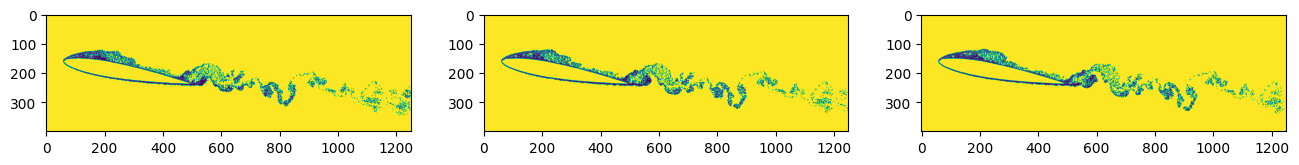

In [266]:
i = 30

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,16))

axes[0].imshow(np_images[i][0])
axes[1].imshow(np_images[i][1])
axes[2].imshow(np_images[i][2])

plt.show()

In [267]:
np_images[0].shape

(3, 400, 1250)

In [273]:
dir_images = '/Users/nikitakamenev/Documents/dataset/scince/data_image/wing_10_11/'
list_path_img = sorted(os.listdir(dir_images))

dir_force_csv = '/Users/nikitakamenev/Documents/dataset/scince/data_image/forces-airfoil-0.csv'
df = pd.read_csv(dir_force_csv)

In [272]:
max_force = max(max(df['Fy']), max(df['Fx']))
min_force = min(min(df['Fy']), min(df['Fx']))

max_force_X = max(df['Fx'])
max_force_Y = max(df['Fy'])
print(max_force, min_force)

df['Fx'] = df['Fx']/max_force_X
df['Fy'] = df['Fy']/max_force_Y

df

85.8021 -0.110929


,t,Fx,Fy,Mz,Ftaux,Ftauy,Mtau
0,0.001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002,0.066877,0.016674,-0.011931,0.000000,0.000000,0.000000
2,0.003,0.066887,0.016681,-0.011841,0.001074,-0.000140,-0.000013
3,0.004,0.066902,0.016690,-0.011741,0.002158,-0.000282,-0.000026
4,0.005,0.066923,0.016710,-0.011325,0.003254,-0.000425,-0.000039
...,...,...,...,...,...,...,...
4995,4.996,0.445227,0.611737,-10.626200,0.502824,-0.092453,0.043798
4996,4.997,0.479659,0.655630,-10.564600,0.513078,-0.092435,0.043615
4997,4.998,0.456789,0.630368,-10.561500,0.508880,-0.091396,0.043093
4998,4.999,0.456209,0.629506,-10.295700,0.513117,-0.093429,0.040491


In [274]:
size_label = 101

Fx = [float(df['Fx'][i]) for i in range(len(df['Fx']))][1:size_label]
Fy = [float(df['Fy'][i]) for i in range(len(df['Fy']))][1:size_label]

labels_list = []

for fx, fy in tqdm(zip(Fx,Fy)):
  labels_list.append(np.array((fx,fy)))

np_labels = np.array(labels_list)

100it [00:00, 315598.50it/s]


In [275]:
np_labels[10]

array([1.27625, 1.44556])

In [276]:
dataset = CustomDataset(np_images, np_labels, transform=transform)

In [277]:
# Разделение на обучающую и тестовую выборку
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Загрузчики данных

In [278]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [279]:
from torchvision.models import resnet18, resnet50
from torchvision import transforms, models

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        resnet = models.resnet18(pretrained=True)
        resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                                 bias=False)  # Задаем свой первый сверточный слой с тремя входными каналами
        self.backbone = nn.Sequential(*list(resnet.children())[:-2])  # Используем все слои, кроме последних двух

        # Определение своих слоев для регрессии на основе выхода ResNet-18
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # Глобальный пулинг
        self.fc1 = nn.Linear(512, 128)  # Предполагая, что размер выхода backbone равен 512
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(-1, 512)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x



model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [280]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


100%|█████████████████████████████████████████████| 3/3 [02:58<00:00, 59.37s/it]


Epoch 1/3, Loss: 0.8088733963668346


100%|█████████████████████████████████████████████| 3/3 [02:54<00:00, 58.32s/it]


Epoch 2/3, Loss: 0.23244002709786096


100%|█████████████████████████████████████████████| 3/3 [02:58<00:00, 59.46s/it]

Epoch 3/3, Loss: 0.015462713316082954


In [281]:
# Оценка модели на тестовых данных
model.eval()
test_loss = 0.0

with torch.no_grad():
    predictions = []
    targets_list = []

    for inputs, targets in tqdm(test_loader):
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Добавляем предсказанные значения в список predictions
        predictions.extend(outputs.tolist())
        # Добавляем истинные значения регрессии в список targets_list
        targets_list.extend(targets.tolist())

print(f"Test Loss: {test_loss / len(test_loader)}")

# Преобразуем списки в numpy массивы для дальнейшего анализа
predictions = np.array(predictions)
targets_array = np.array(targets_list)

# Выведем предсказанные значения и истинные значения регрессии
print("Predicted values:")
print(predictions)

print("True values:")
print(targets_array)

100%|█████████████████████████████████████████████| 1/1 [00:13<00:00, 13.14s/it]

Test Loss: 0.012652355246245861
Predicted values:
[[1.15582728 1.47539556]
 [1.18365192 1.45939553]
 [1.19490063 1.50197411]
 [1.19112074 1.49202335]
 [1.20447481 1.51427758]
 [1.14340937 1.45693839]
 [1.20349455 1.47528136]
 [1.07179821 1.39731896]
 [1.17181134 1.49051559]
 [1.21471643 1.53277886]
 [1.18676305 1.49022079]
 [1.17001688 1.49618375]
 [1.19283962 1.48561049]
 [1.19115651 1.49946058]
 [1.18749475 1.48562133]
 [1.22509325 1.56005323]
 [1.17210245 1.4812721 ]
 [1.18463159 1.46317327]
 [1.15278471 1.46355104]
 [1.08989894 1.38262391]]
True values:
[[1.28038001 1.47262001]
 [1.30689001 1.64968002]
 [1.28281999 1.47729003]
 [1.26566005 1.36851001]
 [1.28298998 1.48093998]
 [1.29394996 1.56219006]
 [1.27471006 1.43175006]
 [1.27098    1.40409005]
 [1.29363    1.56289995]
 [1.27579999 1.43805003]
 [1.28521001 1.49609995]
 [1.29899001 1.64042997]
 [1.26887    1.40495002]
 [1.28284001 1.47923005]
 [1.30482996 1.62292004]
 [1.27424002 1.43666995]
 [1.29077005 1.58124006]
 [1.2932699

In [283]:
model.eval()
test_loss = 0.0
correct_predictions = 0
total_samples = len(test_loader.dataset)

with torch.no_grad():
    for inputs, targets in tqdm(test_loader):
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Подсчет числа правильных предсказаний
        predicted_values = outputs.cpu().numpy()
        true_values = targets.cpu().numpy()
        diff = np.abs(predicted_values - true_values)
        correct_predictions += np.sum(diff < 0.01)  # Предполагая, что разница менее 0.1 считается правильным предсказанием

average_test_loss = test_loss / len(test_loader)
accuracy = correct_predictions / total_samples

print(f"Test Loss: {average_test_loss}")
print(f"Accuracy: {accuracy * 100:.2f}%")

100%|█████████████████████████████████████████████| 1/1 [00:13<00:00, 13.12s/it]

Test Loss: 0.012652355246245861
Accuracy: 20.00%


In [285]:
torch.save(model.state_dict(), 'bestmodel_vortex_2507_vacc_20.py')

In [15]:
# transformation
size = 250

transform = T.Compose([ #T.Resize(128),
                        T.Normalize(mean = 0,
                                    std=255.)
                      ])
#
train_ds = CustomDataset(np_images[:size],
                         np_labels[:size],
                         transform=False)

val_ds = CustomDataset(np_images[size:],
                         np_labels[size:],
                         transform=False)

# val_ds  = CustomDataset(val_data[:,0],
#                         val_data[:,1],
#                         transform=False)

In [16]:
for img, lab in train_ds:
    print(lab)


tensor([0.0669, 0.0167])
tensor([0.0669, 0.0167])
tensor([0.0669, 0.0167])
tensor([0.0669, 0.0167])
tensor([0.0669, 0.0167])
tensor([0.0670, 0.0167])
tensor([0.0670, 0.0168])
tensor([0.0670, 0.0168])
tensor([0.0670, 0.0168])
tensor([0.0670, 0.0168])
tensor([0.0671, 0.0168])
tensor([0.0671, 0.0169])
tensor([0.0671, 0.0168])
tensor([0.0670, 0.0167])
tensor([0.0669, 0.0166])
tensor([0.0669, 0.0166])
tensor([0.0670, 0.0168])
tensor([0.0671, 0.0169])
tensor([0.0672, 0.0170])
tensor([0.0672, 0.0170])
tensor([0.0672, 0.0170])
tensor([0.0673, 0.0171])
tensor([0.0667, 0.0163])
tensor([0.0665, 0.0159])
tensor([0.0672, 0.0169])
tensor([0.0675, 0.0174])
tensor([0.0675, 0.0174])
tensor([0.0676, 0.0174])
tensor([0.0668, 0.0164])
tensor([0.0670, 0.0167])
tensor([0.0670, 0.0167])
tensor([0.0675, 0.0174])
tensor([0.0674, 0.0173])
tensor([0.0674, 0.0172])
tensor([0.0671, 0.0169])
tensor([0.0672, 0.0169])
tensor([0.0675, 0.0173])
tensor([0.0674, 0.0172])
tensor([0.0672, 0.0169])
tensor([0.0678, 0.0177])


MODEL TRAIN

In [17]:
BATCH_SIZE = 64
DIM_IN = 2
DIM_OUT = 2

In [18]:
class Net(nn.Module):
    def __init__(self):

        super(Net, self).__init__()

        self.conv11 = nn.Conv2d(DIM_IN, 32, kernel_size=3, padding=1)
        self.conv12 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.mpool1 = nn.MaxPool2d(2, 2)
        self.bn1    = nn.BatchNorm2d(64)

        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv22 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.mpool2 = nn.MaxPool2d(2, 2)
        self.bn2    = nn.BatchNorm2d(128)

        self.conv31 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv32 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.mpool3 = nn.MaxPool2d(2, 2)
        self.bn3    = nn.BatchNorm2d(256)

        self.aap1   = nn.AdaptiveAvgPool2d((1,1))

        self.flt = nn.Flatten()
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, DIM_OUT)

    def forward(self, x):

        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))
        x = self.mpool1(x)
        x = self.bn1(x)

        x = F.relu(self.conv21(x))
        x = F.relu(self.conv22(x))
        x = self.mpool2(x)
        x = self.bn2(x)

        x = F.relu(self.conv31(x))
        x = F.relu(self.conv32(x))
        x = self.mpool3(x)
        x = self.bn3(x)

        x = self.aap1(x)

        x = self.flt(x)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [19]:
model = Net()

In [20]:
# summary(model,(2,128,128))

In [21]:
params = { "batch_size": 16,
           "shuffle"   : True,
           "drop_last" : True
}

train_dataloader = DataLoader(train_ds, **params)
val_dataloader  = DataLoader(val_ds, **params)

In [24]:
train_losses=[]
train_accu=[]

# device = "cpu"
device = "cpu"

# device=torch.device("cuda:0" if torch.cuda.is_available else "cpu")
model.to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


def train(epoch):
    print('\nEpoch : %d'%epoch)

    model.train()

    running_loss=0
    correct=0
    total=0


    for data in tqdm(train_dataloader):

        inputs, labels = data[0].to(device), data[1].to(device)
        print(labels)

        outputs=model(inputs)

        print(outputs.shape)
        print(labels.shape)
        loss=loss_fn(outputs,labels)

        #Replaces pow(2.0) with abs() for L1 regularization

        l2_lambda = 0.001
        l2_norm = sum(p.pow(2.0).sum()
                      for p in model.parameters())

        loss = loss + l2_lambda * l2_norm

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss=running_loss/len(train_dataloader)
    accu=100.*correct/total

    train_accu.append(accu)
    train_losses.append(train_loss)
    print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [25]:
epochs = 50

for epoch in range(1, epochs+1): 
    train(epoch)
    #test(epoch)
    
    checkpoint = {'state_dict': model.state_dict(),'optimizer' :optimizer.state_dict()}
    
    cp_name = f"./model/cp_model_05_rect_128_serial_" +\
              f"e{epoch}.pt"
    
    print(f"Save checkpoint {cp_name}")
    torch.save(checkpoint, cp_name)
               


Epoch : 1


  0%|                                                    | 0/15 [00:00<?, ?it/s]


IndexError: index 215 is out of bounds for axis 0 with size 150

In [2]:
!python3 --version

Python 3.10.0


In [ ]:
import paraview.simple as pv

# Загрузка VTK файла
file_path = 'путь_к_вашему_файлу.vtk'
reader = pv.OpenDataFile(file_path)

# Отображение объекта в Paraview
pv.Show(reader)

# Установка видового окна
render_view = pv.GetActiveView()
render_view.ViewSize = [800, 600]  # Установите размер вида по вашему желанию

# Сохранение изображения в PNG
image_path = 'путь_к_сохранению/название_изображения.png'
pv.SaveScreenshot(image_path, render_view)
import paraview.simple as pv

# Загрузка VTK файла
file_path = 'путь_к_вашему_файлу.vtk'
reader = pv.OpenDataFile(file_path)

# Отображение объекта в Paraview
pv.Show(reader)

# Установка видового окна
render_view = pv.GetActiveView()
render_view.ViewSize = [800, 600]  # Установите размер вида по вашему желанию

# Сохранение изображения в PNG
image_path = 'путь_к_сохранению/название_изображения.png'
pv.SaveScreenshot(image_path, render_view)


In [ ]:
import os

# Указываете путь к исполняемому файлу ParaView
paraview_executable = '/путь_к_paraview/bin/paraview'

# Указываете путь к вашему VTK файлу
vtk_file = 'путь_к_вашему_файлу.vtk'

# Указываете путь для сохранения изображения
output_image = 'путь_к_сохранению/название_изображения.png'

# Создайте команду для открытия файла в Paraview
command = f'{paraview_executable} --script=paraview_script.py'

# Создайте файл paraview_script.py, который содержит команды для открытия файла и сохранения изображения
with open('paraview_script.py', 'w') as script_file:
    script_file.write(f'''
from paraview.simple import *

# Открываем VTK файл
OpenDataFile("{vtk_file}")

# Отображаем данные
RenderView()

# Сохраняем изображение
SaveScreenshot("{output_image}")
''')

# Запускаем Paraview с помощью созданной команды
os.system(command)

# Удаляем временный скрипт
os.remove('paraview_script.py')
